In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
# spectra = "D:/220701 mass spec/processed/220721 A_340682_BE3_01_82111.d.mzML"
# spectra = "D:/220701 mass spec/processed/220107 B _340681_BD6_01_82106.d.mzML"
# spectra = "D:/220701 mass spec/processed/220721 C_340683_BE4_01_82112.d.mzML"

# spectra = "D:/220118/processed/220118 PanZ labelling A_341167_RC7_01_82179.d.mzML"
# spectra = "D:/220118/processed/220118 PanZ labelling B_341168_RD4_01_82183.d.mzML"
# spectra = "D:/220120/processed/220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML"
spectra = "D:/220121/processed/220121 PanZ 6M A_341575_RA6_01_82401.mzML"


plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/PanZ sortase time course 1.5 eq gvseyg.xlsx"

In [4]:
eng.load_mzml(spectra, clear_hdf5=True)

Reading mzML: D:/220121/processed/220121 PanZ 6M A_341575_RA6_01_82401.mzML
found chromatogram
found chromatogram
Converted to gzip file to improve speed: D:/220121/processed/220121 PanZ 6M A_341575_RA6_01_82401.mzML.gz


False

In [5]:
eng.ticdat[:, 0] = eng.tic[:, 0] = eng.ticdat[:, 0]/60 # add in check in code?

1331 2
Noise Level: 0.11529364385488418 Window: 0.6
0.46923333333333334 0.3251166666666667
1.1807166666666666 0.20779999999999976
2.1325166666666666 0.19114999999999993
3.059266666666667 0.20359999999999978
4.01925 0.13299999999999956
4.93365 0.19113333333333316
Scan Range: [155, 205]
Error in Memory Safe mzML, trying memory heavy method


C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


Getting scans: [155, 205]
Length merge axis: 386658
Getting scans: [382, 428]
Length merge axis: 386658
Getting scans: [607, 656]
Length merge axis: 386658
Getting scans: [834, 866]
Length merge axis: 386658
Getting scans: [1057, 1103]
Length merge axis: 386658


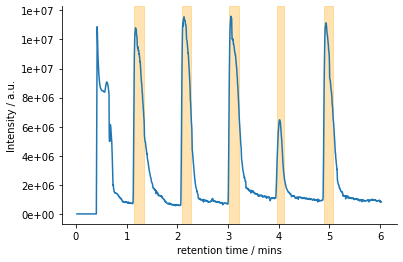

In [6]:
eng.config.chrom_peak_width = 0.6
eng.get_chrom_peaks(lb = 1, ub = 5.5) 
eng.add_chrom_peaks2() 
eng.plot_tic(peak_windows = True)

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [7]:
help(eng.update_config)

Help on method update_config in module unidec_modules.v3_SeqChrom:

update_config(minmz='', maxmz='', massub=10000, masslb=100000, peakthresh=0.01, subtype=2, subbuff=100, datanorm=0, numit=100, massbins=1, mzsig=0, startz=10, endz=100, zzsig=1, psig=1, beta=0, psfun=0, peaknorm=0, peakwindow=10, exnorm=0, numz=50, mtabsig=0.0, molig=0.0, mzbins=0.0, msig=0.0, smooth=0, reductionpercent=0.0, aggressive=0, rawflag=0, nativezub=1000.0, nativezlb=-1000.0, poolflag=2, noiseflag=0, linflag=2, isotopemode=0, baselineflag=1, orbimode=0, peakplotthresh=0.1, adductmass=1.007276467, intthresh=0) method of unidec_modules.v3_SeqChrom.SeqChrom instance
    [summary]
    
    Args:
        minmz (str, optional): [description]. Defaults to "".
        maxmz (str, optional): [description]. Defaults to "".
        massub (int, optional): [description]. Defaults to 10000.
        masslb (int, optional): [description]. Defaults to 100000.
        peakthresh (float, optional): [description]. Defaults to 0

In [8]:
eng.update_config(masslb = 5000, massub = 25000, peakthresh = 0.05, minmz=500)
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 1.4729932999999846
Execution Time: 269.5184439
Execution Time: 1.1257461999999805
Peak info saved to: D:/220121/processed\UniDec_Figures_and_Files\220121 PanZ 6M A_341575_RA6_01_82401_extracts.txt


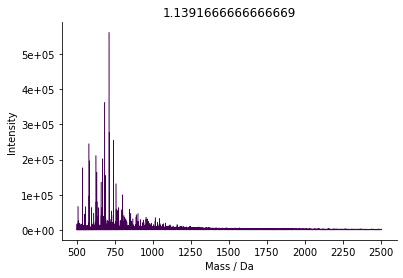

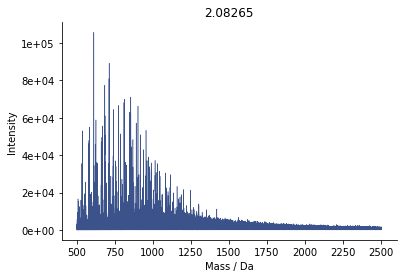

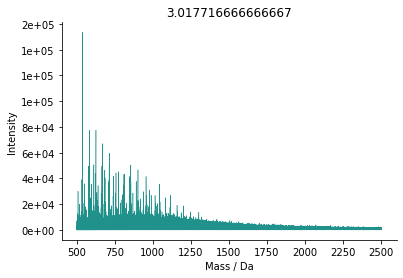

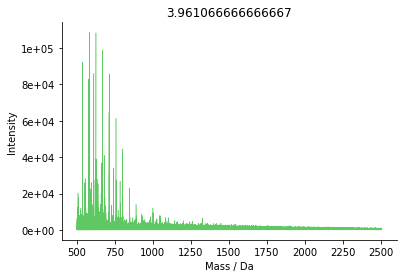

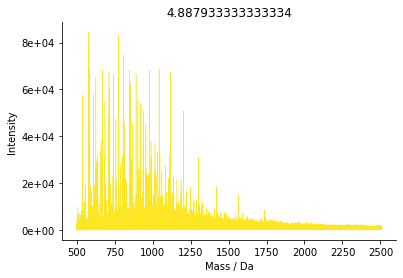

In [9]:
eng.plot_all(dtype = 'data2', combine = False, cmap = 'viridis')

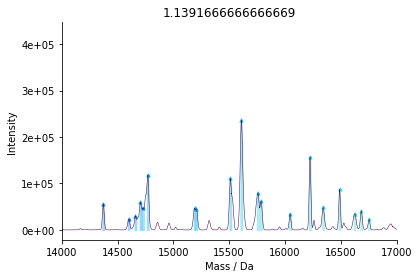

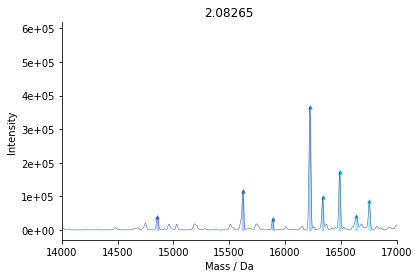

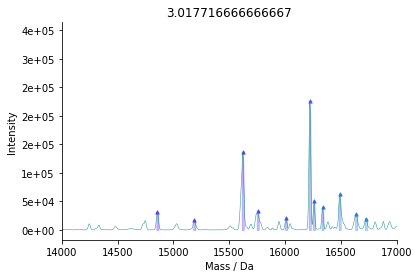

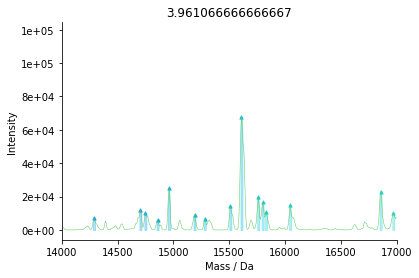

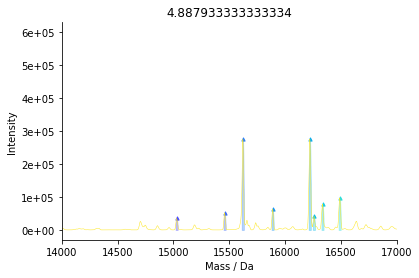

In [10]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [14000, 17000])

In [11]:
eng.upload_map(plate_map)

(  Reaction      Species  Concentration Units     Mass Reagent_Type Sequence
 0     PanZ         PanZ          100.0    uM  16223.0      Protein      NaN
 1     PanZ  PanZ-GVSEYG            NaN    uM  15623.0      Protein      NaN
 2     PanZ      PanZ-OH            NaN    uM  15029.0      Protein      NaN
 3     PanZ      Unknown            NaN   NaN  15459.0      Protein      NaN,
             Type Reaction Time  Species  Valid
 Well ID                                       
 1        Protein     PanZ   30      NaN   True
 2        Protein     PanZ   60      NaN   True
 3        Protein     PanZ   90      NaN   True
 4        Protein     PanZ  120      NaN   True
 5        Protein     PanZ  180      NaN   True)

In [12]:
eng.pmap

,Type,Reaction,Time,Species,Valid
Well ID,,,,,
1,Protein,PanZ,30,NaN,True
2,Protein,PanZ,60,NaN,True
3,Protein,PanZ,90,NaN,True
4,Protein,PanZ,120,NaN,True
5,Protein,PanZ,180,NaN,True


In [13]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,PanZ,PanZ,100.0,uM,16223.0,Protein,NaN
1,PanZ,PanZ-GVSEYG,NaN,uM,15623.0,Protein,NaN
2,PanZ,PanZ-OH,NaN,uM,15029.0,Protein,NaN
3,PanZ,Unknown,NaN,NaN,15459.0,Protein,NaN


In [14]:
eng.process_maps(groupby = 'Reaction', variable = 'Species')

In [15]:
eng.pmap2

,Type,Reaction,Time,Species,Valid,PanZ,PanZ-GVSEYG,PanZ-OH,Unknown,Spectra
Well ID,,,,,,,,,,
1,Protein,PanZ,30,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
2,Protein,PanZ,60,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
3,Protein,PanZ,90,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
4,Protein,PanZ,120,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
5,Protein,PanZ,180,"[PanZ, PanZ-GVSEYG, PanZ-OH, Unknown]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...","<Unknown(Reaction = PanZ, Species = Unknown, C...",<metaunidec.mudstruct.Spectrum object at 0x000...


invalidate data using eng.invalidate()

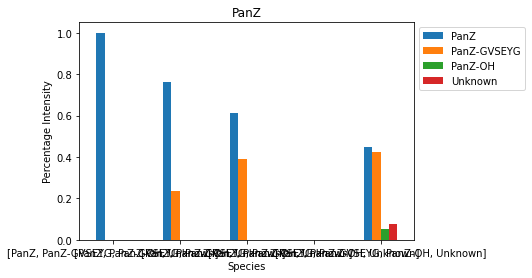

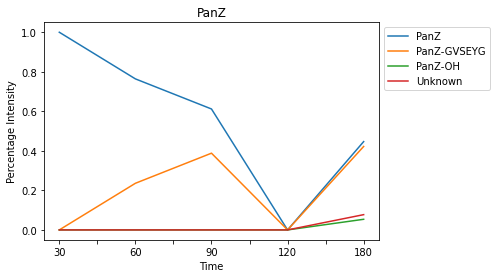

In [16]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Species')
eng.plot_data()

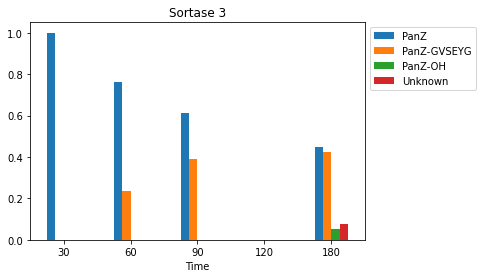

In [17]:
df = eng.data_df['PanZ']

df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Sortase 3')
plt.show()